In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

In [3]:
import seaborn as sns

In [4]:
from sklearn.model_selection import train_test_split as tts

In [5]:
features = pd.read_csv("data/training_set_features.csv")

In [6]:
labels = pd.read_csv("data/training_set_labels.csv")

In [7]:
labels.head()

,respondent_id,h1n1_vaccine,seasonal_vaccine
0,0,0,0
1,1,0,1
2,2,0,0
3,3,0,1
4,4,0,0


In [8]:
full_stack = pd.merge(features, labels, on='respondent_id')

In [9]:
full_stack.head()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,h1n1_vaccine,seasonal_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN,0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe,0,1
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo,0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN,0,1
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb,0,0


In [19]:
X = full_stack.drop(labels=['h1n1_vaccine', 'seasonal_vaccine'], axis=1)

In [20]:
y = pd.DataFrame(full_stack[['h1n1_vaccine', 'seasonal_vaccine']])

In [22]:
X_train, y_train, X_test, y_test = tts(X, y)

In [24]:
test = pd.concat([X_test, y_test])

In [28]:
test.to_csv('./data/test_data.csv')

In [29]:
full_stack.isna().sum()

respondent_id                      0
h1n1_concern                      92
h1n1_knowledge                   116
behavioral_antiviral_meds         71
behavioral_avoidance             208
behavioral_face_mask              19
behavioral_wash_hands             42
behavioral_large_gatherings       87
behavioral_outside_home           82
behavioral_touch_face            128
doctor_recc_h1n1                2160
doctor_recc_seasonal            2160
chronic_med_condition            971
child_under_6_months             820
health_worker                    804
health_insurance               12274
opinion_h1n1_vacc_effective      391
opinion_h1n1_risk                388
opinion_h1n1_sick_from_vacc      395
opinion_seas_vacc_effective      462
opinion_seas_risk                514
opinion_seas_sick_from_vacc      537
age_group                          0
education                       1407
race                               0
sex                                0
income_poverty                  4423
m

In [33]:
X_train['education'].value_counts()

College Graduate    7507
Some College        5263
12 Years            4379
< 12 Years          1800
Name: education, dtype: int64

In [36]:
X_train['income_poverty'].value_counts()

<= $75,000, Above Poverty    9626
> $75,000                    5071
Below Poverty                2017
Name: income_poverty, dtype: int64

In [38]:
X_train['marital_status'].value_counts()

Married        10193
Not Married     8740
Name: marital_status, dtype: int64

In [41]:
X_train['sex'].value_counts()

Female    11915
Male       8115
Name: sex, dtype: int64

In [45]:
X_train['age_group'].value_counts()

65+ Years        5101
55 - 64 Years    4164
45 - 54 Years    3928
18 - 34 Years    3912
35 - 44 Years    2925
Name: age_group, dtype: int64

<AxesSubplot:xlabel='age_group', ylabel='Count'>

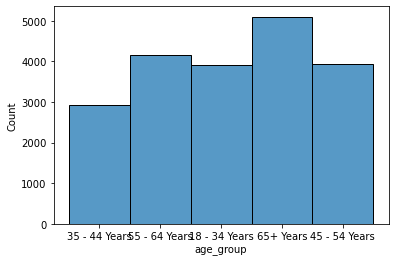

In [48]:
sns.histplot(X_train['age_group'])

<AxesSubplot:xlabel='opinion_h1n1_vacc_effective', ylabel='Count'>

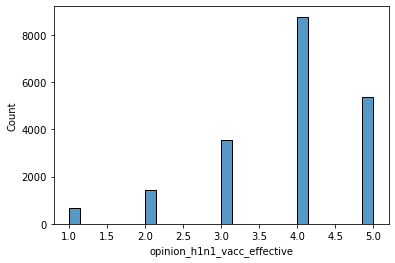

In [50]:
sns.histplot(X_train['opinion_h1n1_vacc_effective'])

In [52]:
training_data = pd.concat([X_train, y_train], axis=1)

In [54]:
training_data.to_csv("./data/training_data.csv")